In [2]:
import pandas as pd

df1 = pd.read_csv("0112.csv", encoding="utf-8")
df2 = pd.read_csv("0113.csv", encoding="utf-8")
df3 = pd.read_csv("0114.csv", encoding="utf-8")
df4 = pd.read_csv("0115.csv", encoding="utf-8")
df5 = pd.read_csv("0116.csv", encoding="utf-8")
df6 = pd.read_csv("0117.csv", encoding="utf-8")
df7 = pd.read_csv("0118.csv", encoding="utf-8")
df8 = pd.read_csv("0119.csv", encoding="utf-8")
df9 = pd.read_csv("0120.csv", encoding="utf-8")
df10 = pd.read_csv("0121.csv", encoding="utf-8")
df11 = pd.read_csv("0122.csv", encoding="utf-8")
df12 = pd.read_csv("0123.csv", encoding="utf-8")
df13 = pd.read_csv("0124.csv", encoding="utf-8")
df14 = pd.read_csv("0125.csv", encoding="utf-8")

In [3]:
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14], axis=0, ignore_index = True)
df.shape

(45343, 2)

In [6]:
# 결측치 제거
df = df.dropna(axis = 0)
df.shape

(43950, 2)

In [9]:
# 데이터 중복 유무 확인
df['sentence'].nunique(), df['score'].nunique()

# 중복 제거
df.drop_duplicates(subset=['sentence'], inplace=True)
print('총 샘플 수 :',len(df))

총 샘플 수 : 43950


<AxesSubplot:>

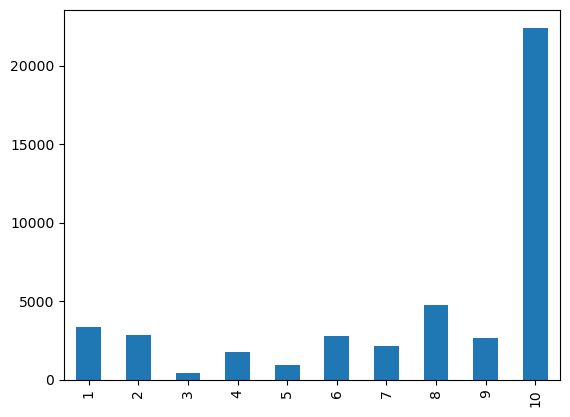

In [18]:
# 데이터 분포 확인
df['score'].value_counts().sort_index(ascending=True).plot(kind='bar')

In [34]:
def rating_to_label(score):
    if score >= 8:
        return 1
    if score <= 3:
        return 0
    
df['y'] = df['score'].apply(lambda x: rating_to_label(x))

In [35]:
df = df.dropna(axis=0)
df.shape

(36391, 3)

In [36]:
df["y"].value_counts()

1    29786
0     6605
Name: y, dtype: int64

In [37]:
df.head()

,sentence,score,y
0,"연기는 뭐 말할 것도 없는데, 정제된 연출이 경이로움",9,1
2,나름 재미있게 감상했음...진정한 사랑이란걸 제대로 모르던 챠밍 왕자가 진정한 사랑...,8,1
3,넷플로시청하기에 10점~배우분들 매력 최고,10,1
4,이걸 영화라고....,1,0
5,너무 재밌어요 크리스마스때 그냥 개봉하시지 ㅠㅅㅠ 흥했으면 좋겠습니다,10,1


In [39]:
df['score'].value_counts().sort_index(ascending=True)

1      3321
2      2858
3       426
8      4723
9      2628
10    22435
Name: score, dtype: int64

<AxesSubplot:>

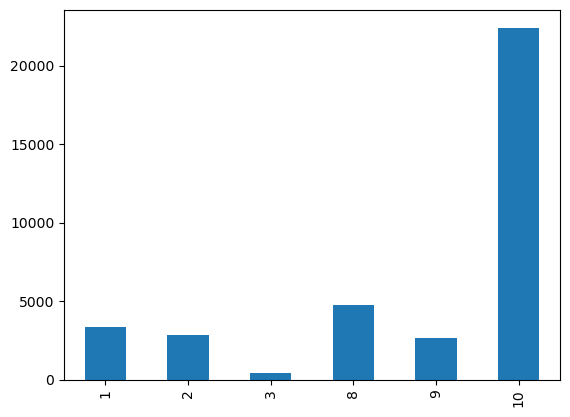

In [40]:
df['score'].value_counts().sort_index(ascending=True).plot(kind='bar')

## 정규 표현식 적용

In [13]:
df['sentence'][0]

'연기는 뭐 말할 것도 없는데, 정제된 연출이 경이로움'

In [14]:
df['sentence'][100]

'13년만의 후속작으로 인한 설레임, 정말 화려한 영상미에 감동과 소름이 끼침, SF와 액션이 버무려져서 3시간30분정도의 영화가 2시간정도로 느껴짐, 개인적인 의견으로 영화에서의 빌런으로 여겨지는 설리, 스파이더로 인해 뭔가 아쉬움...'

In [15]:
# 정규 표현식 함수 정의

import re

def apply_regular_expression(sentence):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 한글 추출 규칙: 띄어 쓰기(1 개)를 포함한 한글
    result = hangul.sub('', sentence)  # 위에 설정한 "hangul"규칙을 "sentence"에 적용(.sub)시킴
    return result

In [16]:
apply_regular_expression(df['sentence'][0])

'연기는 뭐 말할 것도 없는데 정제된 연출이 경이로움'

In [17]:
apply_regular_expression(df['sentence'][100])

'년만의 후속작으로 인한 설레임 정말 화려한 영상미에 감동과 소름이 끼침 와 액션이 버무려져서 시간분정도의 영화가 시간정도로 느껴짐 개인적인 의견으로 영화에서의 빌런으로 여겨지는 설리 스파이더로 인해 뭔가 아쉬움'

## 한국어 형태소 분석 - 명사 단위

In [19]:
from konlpy.tag import Okt
from collections import Counter

In [20]:
okt = Okt()  # 명사 형태소 추출 함수
nouns = okt.nouns(apply_regular_expression(df['sentence'][0]))
nouns

['연기', '뭐', '말', '것', '정제', '연출', '경이', '로움']

In [21]:
# 말뭉치 생성
corpus = "".join(df['sentence'].tolist())
corpus

'연기는 뭐 말할 것도 없는데, 정제된 연출이 경이로움나름 재미있게 감상했음...진정한 사랑이란걸 제대로 모르던 챠밍 왕자가 진정한 사랑, 더 나아가 남을 위해 헌신하는 것을 파악하는 것부터 기존 동화 클리세를 박살내고 멋진 역할을 하는 여장부 레노어가 사랑의 의미를 찾아가는 것도 멋졌다....물론 부족한 부분이나 아쉬운 부분들도 있지만 나름 수작이라 할만하다 생각한다!!넷플로시청하기에 10점~배우분들 매력 최고이걸 영화라고....너무 재밌어요 크리스마스때 그냥 개봉하시지 ㅠㅅㅠ 흥했으면 좋겠습니다 눈물이 살짝 없는 편이라 걱정했었는데 너무 슬펐다 후반부에 급발진이 심해서 놀라움 플러스 슬픔 후반이 너무 슬펐는데 눈물이 고이기만 했고 흐르진 않았다 그렇지만 최근에 본 영화 중 제일 재밌고 슬픈 영화였다 친구들은 영화 끝나고도 울었다 후유증엄청난영화다프랑스영화 &amp;#34;미라클벨리에&amp;#34; 여주 가창력이 소름돋아요. 그에 비해 미국 여주는 가창력이 형편없네요. 아카데미 작품상이라 시청했는데 이정도가 작품상이라 놀랐음너무 과소평가 되었네요. 볼거리가 정말 많으면서도 중간중간에 가슴을 울리는 대사와 장면도 등장하고 판타지 모험 영화답게 신비스러운 분위기도 잘 구현해냈으며 스토리도 탄탄하고 ost도 너무 좋습니다. 그냥 최고!기대한만큼  마음을 울리는영화였습니다.뮤지컬도 보고싶어집니다연기력 또한 몰입도에 영향을미쳤습니다정말 그런 존경스러운 분들이 계시기에우리가 있구나 생각을 해보며 우리나라 영웅들께 감사함을 느낍니다모든 배우들의 열연에 감동했고, 정성화배우의 아바드림으로? 안중근의사가 다녀간 느낌이었습니다. 누가 죄인인가? 별점 테러 위해 로그인하게 만든 죄~ 키보드 두드리고 갑니다.절대 보지 마세요.완전 지루하고 노잼입니다.평점이 도저히 이해가 안갑니다.돈이 너무 아깝습니다. 와..잼있네요기억에남겠어요그렇게 no japan 하고싶냐?나도 저렇게 동네에서 아이들과 놀았었는데.저녁이 되면 여기저기서 밥냄새와 아이들 부르는 소리도 있었고. 사는건 다 똑같아

In [22]:
# 정규 표현식 적용
nouns = okt.nouns(apply_regular_expression(corpus))
nouns

['연기',
 '뭐',
 '말',
 '것',
 '정제',
 '연출',
 '경이',
 '로움',
 '나름',
 '감상',
 '사랑',
 '걸',
 '제대로',
 '챠밍',
 '왕자',
 '사랑',
 '더',
 '남',
 '위해',
 '헌신',
 '것',
 '파악',
 '것',
 '기존',
 '동화',
 '클리',
 '세',
 '박살',
 '역할',
 '여장부',
 '레노어',
 '사랑',
 '의미',
 '것',
 '부분',
 '부분',
 '나름',
 '수작',
 '만하',
 '생각',
 '넷',
 '플로',
 '시청',
 '점',
 '배우',
 '매력',
 '최고',
 '걸',
 '영화',
 '크리스마스',
 '때',
 '그냥',
 '개봉',
 '흥',
 '눈물',
 '살짝',
 '편이',
 '걱정',
 '후반',
 '부',
 '급발진',
 '움',
 '플러스',
 '슬픔',
 '후반',
 '눈물',
 '이기만',
 '최근',
 '영화',
 '중',
 '제일',
 '영화',
 '친구',
 '영화',
 '후유증',
 '영화',
 '프랑스',
 '영화',
 '미라클',
 '리',
 '여주',
 '가창력',
 '소름',
 '그',
 '미국',
 '여주',
 '가창력',
 '형편',
 '아카데미',
 '작품',
 '시청',
 '정도',
 '작품',
 '과소',
 '평가',
 '볼거리',
 '정말',
 '중간',
 '중간',
 '가슴',
 '대사',
 '장면',
 '등장',
 '판타지',
 '모험',
 '화답',
 '신비',
 '분위기',
 '구현',
 '스토리',
 '도',
 '그냥',
 '최고',
 '마음',
 '영화',
 '뮤지컬',
 '연기력',
 '또한',
 '몰입도',
 '영향',
 '정말',
 '존경',
 '분',
 '우리',
 '생각',
 '우리나라',
 '영웅',
 '다모',
 '배우',
 '열연',
 '감동',
 '정성화',
 '배우',
 '아바',
 '드림',
 '안중근',
 '의사',
 '누가',
 '죄인',
 '점',
 '테러',
 '위해',
 '

In [23]:
# 빈도 탐색
counter = Counter(nouns)
counter

Counter({'연기': 1305,
         '뭐': 248,
         '말': 609,
         '것': 1175,
         '정제': 1,
         '연출': 749,
         '경이': 12,
         '로움': 18,
         '나름': 87,
         '감상': 120,
         '사랑': 413,
         '걸': 274,
         '제대로': 77,
         '챠밍': 2,
         '왕자': 9,
         '더': 1052,
         '남': 92,
         '위해': 188,
         '헌신': 21,
         '파악': 5,
         '기존': 27,
         '동화': 35,
         '클리': 3,
         '세': 47,
         '박살': 7,
         '역할': 55,
         '여장부': 1,
         '레노어': 1,
         '의미': 105,
         '부분': 297,
         '수작': 50,
         '만하': 20,
         '생각': 1102,
         '넷': 14,
         '플로': 10,
         '시청': 18,
         '점': 436,
         '배우': 1120,
         '매력': 105,
         '최고': 1105,
         '영화': 6214,
         '크리스마스': 92,
         '때': 797,
         '그냥': 589,
         '개봉': 189,
         '흥': 10,
         '눈물': 871,
         '살짝': 69,
         '편이': 92,
         '걱정': 57,
         '후반': 114,
         '부': 

In [24]:
counter.most_common(10)

[('영화', 6214),
 ('감동', 2130),
 ('진짜', 1353),
 ('연기', 1305),
 ('것', 1175),
 ('배우', 1120),
 ('최고', 1105),
 ('생각', 1102),
 ('스토리', 1084),
 ('정말', 1069)]

In [25]:
# 한 글자 명사 제거
available_counter = Counter({x: counter[x] for x in counter if len(x) > 1})
available_counter.most_common(10)

[('영화', 6214),
 ('감동', 2130),
 ('진짜', 1353),
 ('연기', 1305),
 ('배우', 1120),
 ('최고', 1105),
 ('생각', 1102),
 ('스토리', 1084),
 ('정말', 1069),
 ('시간', 902)]

## 불용어 사전

In [26]:
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
stopwords[:10]

[['휴'],
 ['아이구'],
 ['아이쿠'],
 ['아이고'],
 ['어'],
 ['나'],
 ['우리'],
 ['저희'],
 ['따라'],
 ['의해']]

In [27]:
movie_stopwords = ['영화','연기','스토리','배우']
for word in movie_stopwords:
    stopwords.append(word)

## Word Count

### BoW 벡터 생성

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

def text_cleaning(sentence):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 정규 표현식 처리
    result = hangul.sub('', sentence)
    okt = Okt()  # 형태소 추출
    nouns = okt.nouns(result)
    nouns = [x for x in nouns if len(x) > 1]  # 한글자 키워드 제거
    nouns = [x for x in nouns if x not in stopwords]  # 불용어 제거
    return nouns

vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))
bow_vect = vect.fit_transform(df['sentence'].tolist())
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)

C:\Users\user\.conda\envs\geopandas\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [29]:
# 단어 리스트
word_list

['가가',
 '가가린',
 '가감',
 '가게',
 '가격',
 '가계',
 '가공',
 '가관',
 '가구',
 '가구점',
 '가극',
 '가기',
 '가까이',
 '가끔',
 '가나',
 '가난',
 '가넷',
 '가늠',
 '가능',
 '가능성',
 '가다가',
 '가대',
 '가도',
 '가드',
 '가득',
 '가든',
 '가라',
 '가랑비',
 '가량',
 '가려진',
 '가렵니다좋',
 '가령',
 '가로',
 '가르마',
 '가르침',
 '가면',
 '가묘',
 '가물',
 '가뭄',
 '가미',
 '가방',
 '가부장',
 '가분',
 '가쁨',
 '가사',
 '가사도',
 '가상',
 '가상현실',
 '가성',
 '가세',
 '가속',
 '가수',
 '가스',
 '가슴',
 '가슴속',
 '가습기',
 '가시',
 '가신',
 '가십',
 '가안',
 '가야',
 '가오',
 '가왜',
 '가요',
 '가요무대',
 '가용',
 '가운데',
 '가을',
 '가이거',
 '가자미',
 '가장',
 '가장이',
 '가점',
 '가정',
 '가정사',
 '가정폭력',
 '가제',
 '가족',
 '가족사',
 '가족영화',
 '가죽',
 '가중',
 '가즈',
 '가증',
 '가지',
 '가지가지',
 '가짜',
 '가창력',
 '가치',
 '가치관',
 '가치판단',
 '가해자',
 '각각',
 '각국',
 '각기',
 '각도',
 '각본',
 '각색',
 '각성',
 '각심',
 '각양각색',
 '각오',
 '각인',
 '각자',
 '각종',
 '각하',
 '간간',
 '간간이',
 '간걸',
 '간겨',
 '간격',
 '간극',
 '간나',
 '간다',
 '간만',
 '간반',
 '간선',
 '간섭',
 '간소화',
 '간수',
 '간식',
 '간의',
 '간이',
 '간전',
 '간접',
 '간조',
 '간지',
 '간직',
 '간츠',
 '간판',
 '간호사',
 '간혹',
 '갇아',
 '갈건',
 '갈고',
 '갈등',
 '갈라',

In [30]:
# 각 단어가 전체 리뷰중에 등장한 총 횟수
count_list

array([ 6,  3,  3, ..., 37,  1,  1], dtype=int64)

In [31]:
# 각 단어의 리뷰별 등장 횟수
bow_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [32]:
bow_vect.shape

(16544, 10595)

In [33]:
# "단어" - "총 등장 횟수" Matching

word_count_dict = dict(zip(word_list, count_list))
word_count_dict

{'가가': 6,
 '가가린': 3,
 '가감': 3,
 '가게': 9,
 '가격': 5,
 '가계': 1,
 '가공': 1,
 '가관': 1,
 '가구': 2,
 '가구점': 2,
 '가극': 1,
 '가기': 15,
 '가까이': 7,
 '가끔': 20,
 '가나': 2,
 '가난': 1,
 '가넷': 1,
 '가늠': 3,
 '가능': 14,
 '가능성': 7,
 '가다가': 2,
 '가대': 1,
 '가도': 9,
 '가드': 13,
 '가득': 26,
 '가든': 2,
 '가라': 4,
 '가랑비': 1,
 '가량': 1,
 '가려진': 1,
 '가렵니다좋': 1,
 '가령': 1,
 '가로': 2,
 '가르마': 1,
 '가르침': 2,
 '가면': 20,
 '가묘': 1,
 '가물': 1,
 '가뭄': 3,
 '가미': 11,
 '가방': 1,
 '가부장': 2,
 '가분': 3,
 '가쁨': 1,
 '가사': 19,
 '가사도': 1,
 '가상': 2,
 '가상현실': 2,
 '가성': 3,
 '가세': 18,
 '가속': 3,
 '가수': 5,
 '가스': 1,
 '가슴': 403,
 '가슴속': 9,
 '가습기': 2,
 '가시': 16,
 '가신': 4,
 '가십': 1,
 '가안': 2,
 '가야': 16,
 '가오': 1,
 '가왜': 1,
 '가요': 12,
 '가요무대': 1,
 '가용': 1,
 '가운데': 8,
 '가을': 1,
 '가이거': 1,
 '가자미': 3,
 '가장': 153,
 '가장이': 2,
 '가점': 1,
 '가정': 14,
 '가정사': 5,
 '가정폭력': 2,
 '가제': 2,
 '가족': 384,
 '가족사': 8,
 '가족영화': 60,
 '가죽': 1,
 '가중': 1,
 '가즈': 8,
 '가증': 1,
 '가지': 84,
 '가지가지': 1,
 '가짜': 5,
 '가창력': 14,
 '가치': 57,
 '가치관': 8,
 '가치판단': 1,
 '가해자': 8,
 '각각': 8,
 '각국': 1,


## TF-IDF 적용

### Bag of Words 벡터에 대해서 TF-IDF변환

In [34]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

In [35]:
print(tf_idf_vect.shape)

(16544, 10595)


In [36]:
# 첫 번째 리뷰에서의 단어 중요도(TF-IDF 값) -- 0이 아닌 것만 출력
print(tf_idf_vect[0])

  (0, 7962)	0.6408852603695651
  (0, 6219)	0.2659606760977904
  (0, 2608)	0.4969012196678017
  (0, 494)	0.5211719291206043


In [37]:
# 첫 번째 리뷰에서 모든 단어의 중요도 -- 0인 값까지 포함
print(tf_idf_vect[0].toarray().shape)
print(tf_idf_vect[0].toarray())

(1, 10595)
[[0. 0. 0. ... 0. 0. 0.]]


### “벡터” - “단어” mapping

In [38]:
vect.vocabulary_

{'정제': 7962,
 '연출': 6219,
 '경이': 494,
 '로움': 2608,
 '나름': 1398,
 '감상': 162,
 '사랑': 4369,
 '제대로': 7989,
 '챠밍': 8731,
 '왕자': 6481,
 '위해': 6778,
 '헌신': 10197,
 '파악': 9562,
 '기존': 1203,
 '동화': 2255,
 '클리': 9276,
 '박살': 3518,
 '역할': 6170,
 '여장부': 6133,
 '레노어': 2537,
 '의미': 6963,
 '부분': 4038,
 '수작': 5031,
 '만하': 2851,
 '생각': 4585,
 '플로': 9844,
 '시청': 5352,
 '매력': 2915,
 '최고': 8879,
 '크리스마스': 9244,
 '그냥': 1026,
 '개봉': 264,
 '눈물': 1715,
 '살짝': 4488,
 '편이': 9675,
 '걱정': 369,
 '후반': 10467,
 '급발진': 1124,
 '플러스': 9837,
 '슬픔': 5266,
 '이기만': 7000,
 '최근': 8886,
 '제일': 8017,
 '친구': 9035,
 '후유증': 10475,
 '프랑스': 9804,
 '미라클': 3351,
 '여주': 6136,
 '가창력': 87,
 '소름': 4865,
 '미국': 3331,
 '형편': 10264,
 '아카데미': 5657,
 '작품': 7508,
 '정도': 7906,
 '과소': 735,
 '평가': 9686,
 '볼거리': 3982,
 '정말': 7915,
 '중간': 8313,
 '가슴': 53,
 '대사': 1966,
 '장면': 7570,
 '등장': 2355,
 '판타지': 9596,
 '모험': 3121,
 '화답': 10344,
 '신비': 5402,
 '분위기': 4123,
 '구현': 906,
 '마음': 2765,
 '뮤지컬': 3324,
 '연기력': 6185,
 '또한': 2433,
 '몰입도': 3140,
 '영향': 62

In [39]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100]+'...')

{7962: '정제', 6219: '연출', 494: '경이', 2608: '로움', 1398: '나름', 162: '감상', 4369: '사랑', 7989: '제대로', 8731...


## Training set / Test set 나누기

In [43]:
from sklearn.model_selection import train_test_split

x = tf_idf_vect
y = df['y']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

In [44]:
x_train.shape, y_train.shape

((11580, 10595), (11580,))

In [45]:
x_test.shape, y_test.shape

((4964, 10595), (4964,))

## 모델 학습

### Logistic Regression 모델 학습

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# fit in training set
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

# predict in test set
y_pred = lr.predict(x_test)

### 분류 결과 평가

In [47]:
# classification result for test set

print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

accuracy: 0.90
precision: 0.90
recall: 1.00
F1: 0.95


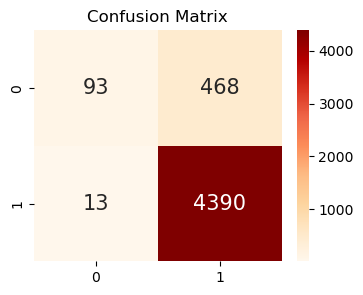

In [50]:
# confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

## 긍정 / 부정 키워드 분석

In [66]:
lr.coef_

array([[-0.02222409,  0.17594948,  0.        , ...,  0.76804855,
         0.05489174,  0.05405263]])

<BarContainer object of 10595 artists>

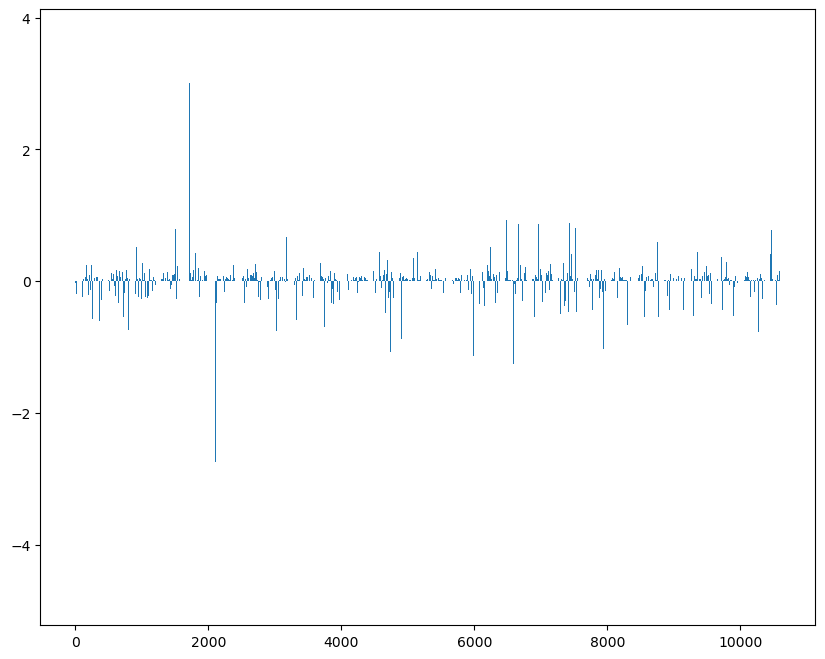

In [67]:
# print logistic regression's coef

plt.figure(figsize=(10, 8))
plt.bar(range(len(lr.coef_[0])), lr.coef_[0])

In [68]:
print(sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse = True)[:5])
print(sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse = True)[-5:])

[(3.701318847668493, 8879), (3.007185657153382, 1715), (2.9282998403483513, 157), (2.6002334874974453, 1804), (2.4794662530445044, 53)]
[(-3.420887603393194, 5436), (-3.7997582933555205, 154), (-4.303129368693146, 5537), (-4.562665109721231, 1652), (-4.794040256566144, 8904)]


In [69]:
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse = True)
coef_neg_index = sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse = False)
coef_pos_index

[(3.701318847668493, 8879),
 (3.007185657153382, 1715),
 (2.9282998403483513, 157),
 (2.6002334874974453, 1804),
 (2.4794662530445044, 53),
 (2.2308280110576875, 8937),
 (1.9998950280547216, 10018),
 (1.9776569435709537, 6124),
 (1.9167913904304024, 2779),
 (1.8071976822106797, 3054),
 (1.7731097934060902, 5244),
 (1.767151355375393, 4369),
 (1.7344472625168441, 7508),
 (1.7099330691770034, 8945),
 (1.65667263330767, 77),
 (1.6401918635209378, 1148),
 (1.5821362325894959, 1183),
 (1.5226966523459988, 4865),
 (1.5055530976128395, 4585),
 (1.500049799174455, 5595),
 (1.4579957443197011, 7213),
 (1.4373640820584626, 7570),
 (1.4344414236979388, 8882),
 (1.3448159821191008, 1957),
 (1.3101407417326147, 2050),
 (1.3011801323210008, 1670),
 (1.2988968979465119, 5481),
 (1.2792794607942761, 3081),
 (1.2632716865926423, 7809),
 (1.245247909049043, 7093),
 (1.2288101804027811, 2765),
 (1.2251319250852526, 4689),
 (1.2144448399664074, 9646),
 (1.2142023362463419, 2915),
 (1.2132696468988857, 660

In [70]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
invert_index_vectorizer

{7962: '정제',
 6219: '연출',
 494: '경이',
 2608: '로움',
 1398: '나름',
 162: '감상',
 4369: '사랑',
 7989: '제대로',
 8731: '챠밍',
 6481: '왕자',
 6778: '위해',
 10197: '헌신',
 9562: '파악',
 1203: '기존',
 2255: '동화',
 9276: '클리',
 3518: '박살',
 6170: '역할',
 6133: '여장부',
 2537: '레노어',
 6963: '의미',
 4038: '부분',
 5031: '수작',
 2851: '만하',
 4585: '생각',
 9844: '플로',
 5352: '시청',
 2915: '매력',
 8879: '최고',
 9244: '크리스마스',
 1026: '그냥',
 264: '개봉',
 1715: '눈물',
 4488: '살짝',
 9675: '편이',
 369: '걱정',
 10467: '후반',
 1124: '급발진',
 9837: '플러스',
 5266: '슬픔',
 7000: '이기만',
 8886: '최근',
 8017: '제일',
 9035: '친구',
 10475: '후유증',
 9804: '프랑스',
 3351: '미라클',
 6136: '여주',
 87: '가창력',
 4865: '소름',
 3331: '미국',
 10264: '형편',
 5657: '아카데미',
 7508: '작품',
 7906: '정도',
 735: '과소',
 9686: '평가',
 3982: '볼거리',
 7915: '정말',
 8313: '중간',
 53: '가슴',
 1966: '대사',
 7570: '장면',
 2355: '등장',
 9596: '판타지',
 3121: '모험',
 10344: '화답',
 5402: '신비',
 4123: '분위기',
 906: '구현',
 2765: '마음',
 3324: '뮤지컬',
 6185: '연기력',
 2433: '또한',
 3140: '몰입도',
 6272: '영

In [71]:
for coef in coef_pos_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])

최고 3.701318847668493
눈물 3.007185657153382
감동 2.9282998403483513
다시 2.6002334874974453
가슴 2.4794662530445044
추억 2.2308280110576875
한번 1.9998950280547216
여운 1.9776569435709537
마지막 1.9167913904304024
명작 1.8071976822106797
슬램덩크 1.7731097934060902
사랑 1.767151355375393
작품 1.7344472625168441
추천 1.7099330691770034
가족 1.65667263330767
기대 1.6401918635209378
기억 1.5821362325894959
소름 1.5226966523459988
생각 1.5055530976128395
아바타 1.500049799174455


In [72]:
for coef in coef_neg_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])

최악 -4.794040256566144
노잼 -4.562665109721231
쓰레기 -4.303129368693146
감독 -3.7997582933555205
실망 -3.420887603393194
별로 -3.34350941829219
알바 -3.2976337127651068
좀비 -3.227785918644733
억지 -3.1006972383207065
도대체 -2.7442965633112433
수준 -2.741460577425646
무슨 -2.491182899650429
북한 -2.2511626439641574
개연 -2.2400718592421374
포인트 -2.191629730386437
신파 -2.1890360174039034
칭찬 -2.1349415089942942
불륜 -2.104423482034011
고생 -2.0527965492923768
용도 -2.0216377403536074
